In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import csv
%matplotlib inline

## Aufgabe 1

Perzeptronklassifikator $f(x): R² \rightarrow \{0,1\}$ mit Parametern $w_0 = 2, w_1 = -0.4$ und $w_2 = 0.5$

### 1) Welches geometrische Objekt ist die Entscheidungsoberfläche?

Eine Gerade

### 2) Zeichnen Sie die Entscheidungsoberfläche und markieren Sie den Halbraum welcher positiv klassifiziert und welcher Halbraum negativ ist

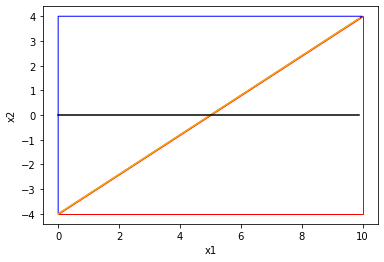

In [2]:
f = lambda x: -4 + 0.8 * x 
x_1 = np.arange(0.0, 10.0, 0.1)
x_2 = [f(x_i) for x_i in x_1]
ply = plt.Polygon([[0.0, -4.0], [10.0, 4.0], [0.0, 4.0]], fill=False, closed=True, color='b')
plt.gca().add_line(ply)
ply = plt.Polygon([[0.0, -4.0], [10.0, -4.0], [10.0, 4.0]], fill=False, closed=True, color='r')
plt.gca().add_line(ply)
plt.plot(x_1, x_2, c="orange")
plt.plot(x_1, [0 for x_i in x_1], c="black")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### 3) Was müssten Sie an $f(x)$ ändern um eine entgegengesetzte Klassifikation zu erhalten?

Vorzeichen der Gewichte $w_i$ umdrehen zu:

$f(x) = -2 + 0.4x_1 - 0.5x_2$

### 4) Berechnen Sie die Gewichte eines Perzeptronklassifikators, wenn Sie wissen, dass
- die Punkte (3,0) und (0,3) auf der Entscheidungsoberfläche liegen und dass
- der Ursprung (0,0) negativ klassifiziert wird

$w_0 + 3x_1 = 0 \Rightarrow w_0 = -3x_1$

$w_0 + 3x_2 = 0 \Rightarrow w_0 = -3x_2$

$w_0 < 0 \Rightarrow x_1 = x_2 = 1 \Rightarrow w_0 = -3$

$f(x_1, x_2) = -3 + x_1 + x_2$

## Aufgabe 2

$f(x): R² \rightarrow \{0, 1\} = \alpha(w_1x_1 + w_2x_2 + w_0)$

- $d¹ = [1,2]$ (Klasse 1)
- $d² = [2,3]$ (Klasse 0)
- $d³ = [2,0]$ (Klasse 1)

### 1) Zeichnen Sie die drei Datenpunkte in ein Koordinatensystem

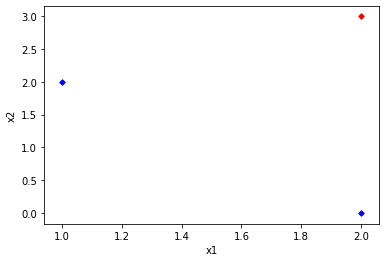

In [3]:
plt.scatter(1, 2, marker="D", s=15, color='blue')
plt.scatter(2, 3, marker="D", s=15, color='red')
plt.scatter(2, 0, marker="D", s=15, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### 2) Angenommen die Gewichte sind anfangs $w = 0$, zeichnen Sie in das Koordinatensystem die Entscheidungsoberfläche ein

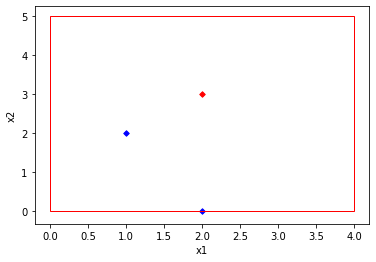

In [4]:
ply = plt.Polygon([[0.0, 0.0], [4.0, 0.0], [4.0, 5.0], [0.0, 5.0]], fill=False, closed=True, color='r')
plt.gca().add_line(ply)
plt.scatter(1, 2, marker="D", s=15, color='blue')
plt.scatter(2, 3, marker="D", s=15, color='red')
plt.scatter(2, 0, marker="D", s=15, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### 3) Führen Sie das Training schrittweise durch bis alle Datenpunkte korrekt klassifiziert werden. Was ist der endgültige Wert von `w`? Wieviele Iterationen wurden benötigt?

In [5]:
alpha = lambda x: 1 if x > 0 else 0

def sum(x, y, w):
    s = 0.0
    for i in range(len(y)):
        nv = np.abs(y[i] - alpha(np.dot(w, x[i])))
        s += nv
    return s

def perceptron_learn(x, y):
    w = np.array([0] * len(y))
    err = lambda: (1.0 / len(y)) * sum(x, y, w)
    iters = 0
    while err() != 0.0:
        _w = w.copy()
        o = np.array([0] * len(y))
        for i in range(len(y)):
            o[i] = alpha(np.dot(w, x[i]))
            _w = _w + (y[i] - o[i]) * x[i]
        iters += 1

        w = _w
    return w, iters


In [6]:
x = np.array([
    [1.0, 1.0, 2.0],
    [1.0, 2.0, 3.0],
    [1.0, 2.0, 0.0]
])
y = np.array([
    1, 0, 1
])

w, iters = perceptron_learn(x, y)
print("W:", w, "\nIterations:", iters)

W: [ 8. -1. -2.] 
Iterations: 29


### 4) Zeichnen Sie nochmals die drei Datenpunkte in ein Koordinatensystem, zeichnen Sie die Entscheidungsoberfläche ebenfalls

$f(x_1, x_2) = 8 -x_1 -2x_2$

$8 - x_1 - 2x_2 = 0$

$\Leftrightarrow x_2 = 4 - 0.5x_1$

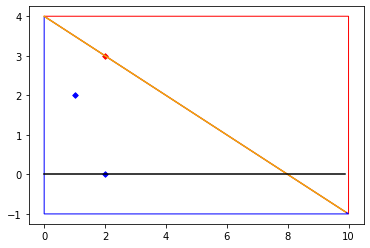

In [7]:
f = lambda x: 4 - 0.5 * x
x_1 = np.arange(0, 10, 0.1)
x_2 = [f(x) for x in x_1]
ply = plt.Polygon([[0.0, 4.0], [10.0, -1.0], [10.0, 4.0]], color='red', closed=True, fill=False)
plt.gca().add_line(ply)
ply = plt.Polygon([[0.0, 4.0], [10.0, -1.0], [0.0, -1.0]], color='blue', closed=True, fill=False)
plt.gca().add_line(ply)
plt.plot(x_1, x_2, color="orange")
plt.scatter(1, 2, marker="D", s=15, color='blue')
plt.scatter(2, 3, marker="D", s=15, color='red')
plt.scatter(2, 0, marker="D", s=15, color='blue')
plt.plot(x_1, [0 for x in x_1], color='black')
plt.show()

## Aufgabe 3 - `ex04_03.ipynb`

### 1) Führen Sie die Zellen bis Implementierung aus

In [8]:
def load_data(filename):
    """
    load a 2-d dataset with labels from a csv file in the format y,x1,x2
    and outputs three numpy arrays for the x1, x2, and y values where the labels
    have been converted to {0.0, 1.0}
    """
    with open(filename, 'r') as csvfile:
        pointreader = csv.reader(csvfile, delimiter=',')
        x1 = []
        x2 = []
        y = []
        for row in pointreader:
            x1.append(float(row[1]))
            x2.append(float(row[2]))
            y.append(0.0 if float(row[0]) == -1.0 else 1.0)
    return np.array(x1), np.array(x2), np.array(y)

# load linearly seperable dataset https://github.com/cuekoo/Binary-classification-dataset
x1, x2, y = load_data('linsep.csv')

# shuffle data to prevent unwanted effects during learning
s = np.arange(x1.shape[0])
np.random.shuffle(s)
x1 = x1[s]
x2 = x2[s]
y = y[s]

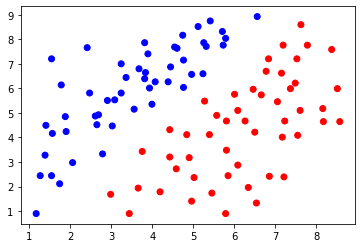

In [9]:
plt.scatter(x1, x2, c=y, cmap=matplotlib.colors.ListedColormap(['red', 'blue']))

### 2) Welche besondere Eigenschaft besitzt der Datensatz wenn Sie sich den Scatterplot ansehen?

Der Datensatz ist linear separierbar

### 3) Implementieren Sie die Funktionen `perceptron_classify`, `perceptron_learn_step`, `perceptron_accuracy` und `perceptron_learn`

In [10]:
alpha = lambda x: 1 if x > 0 else 0

In [11]:
def perceptron_visualize(x1, x2, y, w):
    """
    scatter plot the data points and add a plot of the decision surface
    """
    plt.figure()
    plt.scatter(x1, x2, c=y, cmap=matplotlib.colors.ListedColormap(['red', 'blue']))
    plt.plot([x1.min(), x1.max()], [-(w[0] + w[1] * x1.min()) / w[2] , -(w[0] + w[1] * x1.max()) / w[2]])

In [12]:
def perceptron_classify(x1, x2, w):
    """
    classify a 2-d data point [x1,x2]^T via the weights w=[w0,w1,w2]^T
    """
    return alpha(np.dot([1, x1, x2], w))
    pass

In [13]:
def perceptron_learn_step(x1, x2, y, w):
    """
    perform a full perceptron learning step over all data points [x1_i,x2_i]^T 
    with labels y_i, update the weights w accordingly and return the new weights
    """
    _w = w.copy()
    for i in range(len(y)):
        x_i = np.array([1, x1[i], x2[i]])
        o = alpha(np.dot(x_i, w))
        _w = _w + (y[i] - o) * x_i
    return _w


In [14]:
def perceptron_accuracy(x1, x2, y, w):
    """
    compute the accuracy when applying the perceptron with weights w to all 
    data points [x1_i,x2_i]^T with labels y_i
    """ 
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(y)):
        pred = perceptron_classify(x1[i], x2[i], w)
        if pred == 1 and y[i] == 1:
            tp += 1
        elif pred == 1 and y[i] == 0:
            fp += 1
        elif pred == 0 and y[i] == 1:
            fn += 1
        else:
            tn += 1
    return (tp + tn) / (tp + tn + fp + fn)

In [15]:
def perceptron_learn(x1, x2, y, gamma):
    """
    implementation of the perceptron learning algorithm on data points 
    [x1_i,x2_i]^T with labels y_i with accuracy threshold gamma and visualization
    every 10 iterations
    """
    w = np.array([0] * 3)
    iters = 0
    while perceptron_accuracy(x1, x2, y, w) < gamma:
        w = perceptron_learn_step(x1, x2, y, w)
        if iters % 25 == 0:
            perceptron_visualize(x1, x2, y, w)
        iters += 1
    return w, iters
        

### 4) Trainieren Sie das Perzeptron anhand des geladenen Datensatzes. Wie viele Iterationen wurden benötigt um eine 100%-ige Genauigkeit zu erreichen? Was sind die finalen Gewichte?

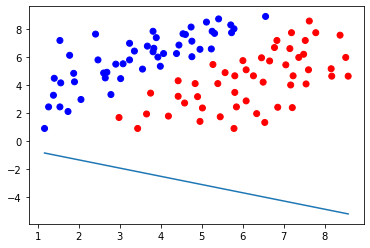

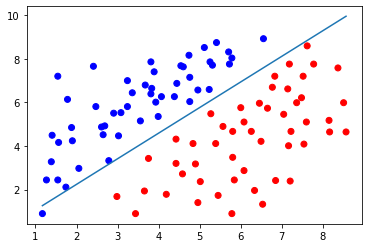

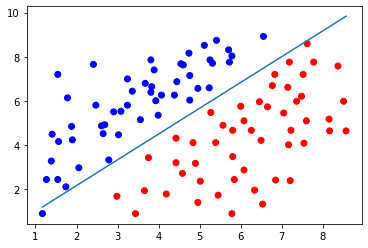

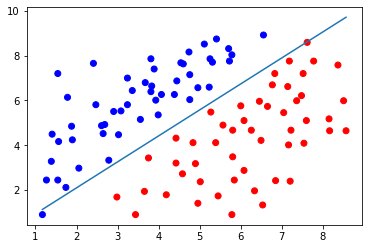

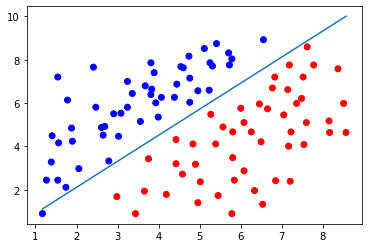

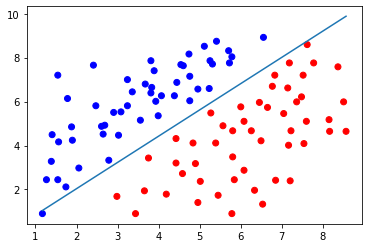

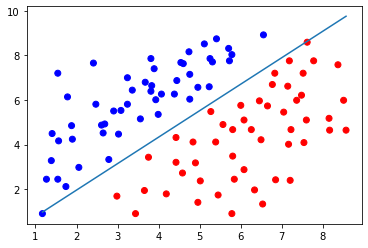

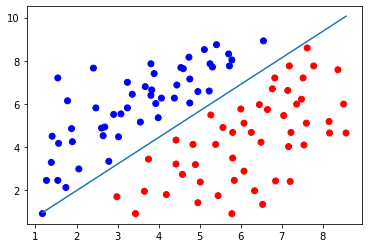

W: [ 175.     -417.1839  347.6963] 
Iterations: 181


In [16]:
w, iters = perceptron_learn(x1, x2, y, 1.0)
plt.show()
print("W:", w, "\nIterations:", iters)

## Aufgabe 4

### 1) Implementieren Sie den Adaline Klassifikations- und Lernalgorithmus

In [17]:
def sigma(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1

In [18]:
def adaline_classify(x1, x2, w):
    return sigma(np.dot([1, x1, x2], w))

In [19]:
def adaline_accuracy(x1, x2, y, w):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(y)):
        pred = adaline_classify(x1[i], x2[i], w)
        if (pred == 1 or pred == 0) and y[i] == 1:
            tp += 1
        elif (pred == 1 or pred == 0) and y[i] == 0:
            fp += 1
        elif pred == -1 and y[i] == 1:
            fn += 1
        elif pred == -1 and y[i] == 0:
            tn += 1
    return (tp + tn) / (tp + tn + fp + fn)

In [20]:
def adaline_learn_one_step(x1, x2, y, w, eta):
    _w = w.copy()
    for i in range(len(y)):
        x_i = np.array([1, x1[i], x2[i]])
        b = y[i] - np.dot(w, x_i)
        _w = _w + eta * b * x_i
    return _w

In [21]:
def adaline_learn(x1, x2, y, eta, gamma):
    w = np.array([0] * 3)
    iters = 0
    while iters < 100:
        w = adaline_learn_one_step(x1, x2, y, w, eta)
        print("W:", w)
        print("ACC:", adaline_accuracy(x1, x2, y, w))
        iters += 1
    return w, iters

### 2) Wenden Sie den Adaline Lernalgorithmus auf den Datensatz `linsep.csv` an. Wie viele Iterationen werden benötigt, um eine 100%-ige Genauigkeit zu erreichen? Was sind die finalen Gewichte?

In [22]:
w, iters = adaline_learn(x1, x2, y, 0.1, 1.0)
print("W:", w, "\nIterations:", iters)
plt.show()

W: [ 5.      17.55648 29.78239]
ACC: 0.5
W: [ -2426.49041075 -12744.26145567 -13927.30792525]
ACC: 0.5
W: [1358517.18772194 7214870.68098788 7704738.55916818]
ACC: 0.5
W: [-7.59699997e+08 -4.03723454e+09 -4.30575555e+09]
ACC: 0.5
W: [4.24814110e+11 2.25764903e+12 2.40763195e+12]
ACC: 0.5
W: [-2.37549758e+14 -1.26244645e+15 -1.34630932e+15]
ACC: 0.5
W: [1.32834286e+17 7.05941331e+17 7.52836029e+17]
ACC: 0.5
W: [-7.42789534e+19 -3.94751876e+20 -4.20974687e+20]
ACC: 0.5
W: [4.15356839e+22 2.20739367e+23 2.35402772e+23]
ACC: 0.5
W: [-2.32261355e+25 -1.23434165e+26 -1.31633722e+26]
ACC: 0.5
W: [1.29877089e+28 6.90225456e+28 7.36076160e+28]
ACC: 0.5
W: [-7.26253327e+30 -3.85963790e+31 -4.11602820e+31]
ACC: 0.5
W: [4.06110039e+33 2.15825200e+34 2.30162164e+34]
ACC: 0.5
W: [-2.27090682e+36 -1.20686236e+37 -1.28703252e+37]
ACC: 0.5
W: [1.26985726e+39 6.74859447e+39 7.19689409e+39]
ACC: 0.5
W: [-7.10085255e+41 -3.77371347e+42 -4.02439593e+42]
ACC: 0.5
W: [3.97069094e+44 2.11020434e+45 2.25038224

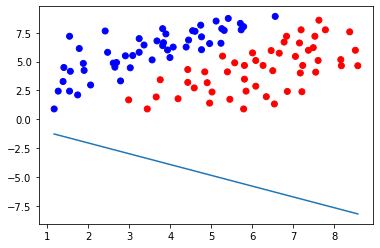

In [23]:
perceptron_visualize(x1, x2, y, [1358517.18772195, 7214870.68098788, 7704738.55916819])

### 3) Experimentieren Sie mit verschiedenen Werten für $\eta$. Was passiert und warum?

In [24]:
etas = np.arange(0.001, 0.01, 0.001)
for eta in etas:
    w, iters = adaline_learn(x1, x2, y, eta, 1.0)
    print("W:", w, "\nIterations:", iters)

W: [0.05      0.1755648 0.2978239]
ACC: 0.5
W: [-0.14364904 -0.92680784 -0.80303947]
ACC: 0.5
W: [0.78486454 3.94603821 4.44401972]
ACC: 0.5
W: [ -3.45013406 -18.61444646 -19.58097053]
ACC: 0.5
W: [16.07681591 85.11223098 91.05922779]
ACC: 0.5
W: [ -73.74513243 -392.28669581 -418.03699877]
ACC: 0.5
W: [ 339.640178   1804.58747921 1924.78302805]
ACC: 0.5
W: [-1562.65949373 -8305.13137131 -8856.50301412]
ACC: 0.5
W: [ 7191.47784424 38218.26605653 40757.38304858]
ACC: 0.5
W: [ -33093.72026529 -175875.49260224 -187558.31904354]
ACC: 0.5
W: [152292.79568928 809352.07040655 863116.52523925]
ACC: 0.5
W: [ -700828.28925614 -3724518.37432009 -3971932.54410326]
ACC: 0.5
W: [ 3225107.8560281  17139677.80943571 18278242.79911505]
ACC: 0.5
W: [-14841465.24154073 -78874244.04447693 -84113748.61543943]
ACC: 0.5
W: [6.82982121e+07 3.62967517e+08 3.87078938e+08]
ACC: 0.5
W: [-3.14298194e+08 -1.67032243e+09 -1.78127959e+09]
ACC: 0.5
W: [1.44635346e+09 7.68657492e+09 8.19718326e+09]
ACC: 0.5
W: [-6.65590

W: [1.92539797e+43 1.02324336e+44 1.09121598e+44]
ACC: 0.5
W: [-1.96461870e+44 -1.04408703e+45 -1.11344426e+45]
ACC: 0.5
W: [2.00463837e+45 1.06535529e+46 1.13612534e+46]
ACC: 0.5
W: [-2.04547325e+46 -1.08705679e+47 -1.15926844e+47]
ACC: 0.5
W: [2.08713995e+47 1.10920035e+48 1.18288297e+48]
ACC: 0.5
W: [-2.12965540e+48 -1.13179498e+49 -1.20697853e+49]
ACC: 0.5
W: [2.17303690e+49 1.15484987e+50 1.23156492e+50]
ACC: 0.5
W: [-2.21730210e+50 -1.17837439e+51 -1.25665214e+51]
ACC: 0.5
W: [2.26246898e+51 1.20237811e+52 1.28225039e+52]
ACC: 0.5
W: [-2.30855592e+52 -1.22687079e+53 -1.30837009e+53]
ACC: 0.5
W: [2.35558166e+53 1.25186239e+54 1.33502184e+54]
ACC: 0.5
W: [-2.40356533e+54 -1.27736307e+55 -1.36221650e+55]
ACC: 0.5
W: [2.45252643e+55 1.30338321e+56 1.38996512e+56]
ACC: 0.5
W: [-2.50248487e+56 -1.32993338e+57 -1.41827899e+57]
ACC: 0.5
W: [2.55346099e+57 1.35702439e+58 1.44716961e+58]
ACC: 0.5
W: [-2.60547549e+58 -1.38466725e+59 -1.47664874e+59]
ACC: 0.5
W: [2.65854954e+59 1.41287319e+6

ACC: 0.5
W: [1.48298629e+23 7.88125836e+23 8.40479924e+23]
ACC: 0.5
W: [-3.17468867e+24 -1.68717281e+25 -1.79924933e+25]
ACC: 0.5
W: [6.79618427e+25 3.61179900e+26 3.85172571e+26]
ACC: 0.5
W: [-1.45488662e+27 -7.73192401e+27 -8.24554483e+27]
ACC: 0.5
W: [3.11453456e+28 1.65520421e+29 1.76515709e+29]
ACC: 0.5
W: [-6.66740995e+29 -3.54336251e+30 -3.77874309e+30]
ACC: 0.5
W: [1.42731938e+31 7.58541926e+31 8.08930797e+31]
ACC: 0.5
W: [-3.05552026e+32 -1.62384134e+33 -1.73171084e+33]
ACC: 0.5
W: [6.54107564e+33 3.47622276e+34 3.70714334e+34]
ACC: 0.5
W: [-1.40027449e+35 -7.44169048e+35 -7.93603150e+35]
ACC: 0.5
W: [2.99762416e+36 1.59307274e+37 1.69889832e+37]
ACC: 0.5
W: [-6.41713513e+37 -3.41035517e+38 -3.63690026e+38]
ACC: 0.5
W: [1.37374204e+39 7.30068508e+39 7.78565931e+39]
ACC: 0.5
W: [-2.94082508e+40 -1.56288715e+41 -1.66670754e+41]
ACC: 0.5
W: [6.29554304e+41 3.34573565e+42 3.56798816e+42]
ACC: 0.5
W: [-1.34771233e+43 -7.16235146e+43 -7.63813638e+43]
ACC: 0.5
W: [2.88510222e+44 1.53

W: [-1.13534250e+78 -6.03372237e+78 -6.43453405e+78]
ACC: 0.5
W: [3.06647551e+79 1.62966346e+80 1.73791971e+80]
ACC: 0.5
W: [-8.28232188e+80 -4.40159958e+81 -4.69399164e+81]
ACC: 0.5
W: [2.23699343e+82 1.18883925e+83 1.26781217e+83]
ACC: 0.5
W: [-6.04195260e+83 -3.21096625e+84 -3.42426621e+84]
ACC: 0.5
W: [1.63188638e+85 8.67258060e+85 9.24868791e+85]
ACC: 0.5
W: [-4.40760353e+86 -2.34239940e+87 -2.49800170e+87]
ACC: 0.5
W: [1.19046087e+88 6.32664627e+88 6.74691647e+88]
ACC: 0.5
W: [-3.21534612e+89 -1.70878002e+90 -1.82229187e+90]
ACC: 0.5
W: [8.68441032e+90 4.61528752e+91 4.92187457e+91]
ACC: 0.5
W: [-2.34559452e+92 -1.24655477e+93 -1.32936165e+93]
ACC: 0.5
W: [6.33527605e+93 3.36685157e+94 3.59050677e+94]
ACC: 0.5
W: [-1.71111086e+95 -9.09361524e+95 -9.69769128e+95]
ACC: 0.5
W: [4.62158295e+96 2.45611772e+97 2.61927416e+97]
ACC: 0.5
W: [-1.24825512e+98 -6.63379098e+98 -7.07446436e+98]
ACC: 0.5
W: [3.37144408e+099 1.79173752e+100 1.91076012e+100]
ACC: 0.5
W: [-9.10601927e+100 -4.83934

ACC: 0.5
W: [-1.49111682e+143 -7.92446764e+143 -8.45087886e+143]
ACC: 0.5
W: [4.86269686e+144 2.58425654e+145 2.75592506e+145]
ACC: 0.5
W: [-1.58577922e+146 -8.42754637e+146 -8.98737640e+146]
ACC: 0.5
W: [5.17140143e+147 2.74831607e+148 2.93088284e+148]
ACC: 0.5
W: [-1.68645120e+149 -8.96256266e+149 -9.55793307e+149]
ACC: 0.5
W: [-1.68645120e+149 -8.96256266e+149 -9.55793307e+149] 
Iterations: 100
W: [0.35      1.2289536 2.0847673]
ACC: 0.5
W: [-11.23880301 -60.16102744 -64.36614166]
ACC: 0.5
W: [ 433.70698998 2303.66261112 2457.73444486]
ACC: 0.5
W: [-16567.55817852 -88048.22260162 -93897.68926877]
ACC: 0.5
W: [ 633103.08840168 3364593.60413195 3588100.29326846]
ACC: 0.5
W: [-2.41927323e+07 -1.28571097e+08 -1.37111895e+08]
ACC: 0.5
W: [9.24475849e+08 4.91308182e+09 5.23945092e+09]
ACC: 0.5
W: [-3.53269558e+10 -1.87743384e+11 -2.00214912e+11]
ACC: 0.5
W: [1.34994744e+12 7.17422984e+12 7.65080383e+12]
ACC: 0.5
W: [-5.15854833e+13 -2.74148536e+14 -2.92359837e+14]
ACC: 0.5
W: [1.97123385e

W: [1.15854032e+52 6.15700607e+52 6.56600731e+52]
ACC: 0.5
W: [-5.07612218e+53 -2.69768038e+54 -2.87688349e+54]
ACC: 0.5
W: [2.22409318e+55 1.18198348e+56 1.26050097e+56]
ACC: 0.5
W: [-9.74482156e+56 -5.17883790e+57 -5.52286081e+57]
ACC: 0.5
W: [4.26967485e+58 2.26909788e+59 2.41983085e+59]
ACC: 0.5
W: [-1.87074983e+60 -9.94200877e+60 -1.06024424e+61]
ACC: 0.5
W: [8.19665446e+61 4.35607205e+62 4.64543977e+62]
ACC: 0.5
W: [-3.59134841e+63 -1.90860460e+64 -2.03539051e+64]
ACC: 0.5
W: [1.57354241e+65 8.36251439e+65 8.91802444e+65]
ACC: 0.5
W: [-6.89444582e+66 -3.66401962e+67 -3.90741528e+67]
ACC: 0.5
W: [3.02078819e+68 1.60538316e+69 1.71202650e+69]
ACC: 0.5
W: [-1.32355255e+70 -7.03395547e+70 -7.50121122e+70]
ACC: 0.5
W: [5.79912005e+71 3.08191408e+72 3.28664129e+72]
ACC: 0.5
W: [-2.54087331e+73 -1.35033473e+74 -1.44003557e+74]
ACC: 0.5
W: [1.11327876e+75 5.91646569e+75 6.30948817e+75]
ACC: 0.5
W: [-4.87780951e+76 -2.59228808e+77 -2.76449012e+77]
ACC: 0.5
W: [2.13720287e+78 1.13580604e+7

ACC: 0.5
W: [2.39848748e+111 1.27466448e+112 1.35933864e+112]
ACC: 0.5
W: [-1.18525238e+113 -6.29896596e+113 -6.71739739e+113]
ACC: 0.5
W: [5.85712124e+114 3.11273852e+115 3.31951336e+115]
ACC: 0.5
W: [-2.89439362e+116 -1.53821138e+117 -1.64039259e+117]
ACC: 0.5
W: [1.43031262e+118 7.60132670e+118 8.10627212e+118]
ACC: 0.5
W: [-7.06812711e+119 -3.75632169e+120 -4.00584884e+120]
ACC: 0.5
W: [3.49283226e+121 1.85624868e+122 1.97955666e+122]
ACC: 0.5
W: [-1.72604101e+123 -9.17296076e+123 -9.78230762e+123]
ACC: 0.5
W: [8.52951796e+124 4.53297073e+125 4.83408959e+125]
ACC: 0.5
W: [-4.21500280e+126 -2.24004268e+127 -2.38884556e+127]
ACC: 0.5
W: [2.08291356e+128 1.10695425e+129 1.18048766e+129]
ACC: 0.5
W: [-1.02930629e+130 -5.47019807e+130 -5.83357562e+130]
ACC: 0.5
W: [5.08648777e+131 2.70318912e+132 2.88275817e+132]
ACC: 0.5
W: [-2.51357231e+133 -1.33582575e+134 -1.42456277e+134]
ACC: 0.5
W: [1.24212345e+135 6.60120454e+135 7.03971325e+135]
ACC: 0.5
W: [-6.13815911e+136 -3.26209473e+137 -3